In [1]:
# xgb.XGBClassifier(learning_rate=0.01,n_estimators=96,max_depth=3)

In [2]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [3]:
df = pd.read_excel('./src_data.xlsx')

In [4]:
pd.options.display.max_columns = None
df.head()

,AGE,SEX,H_HT,H_DM,H_HL,H_CHD,H_AF,H_STROKE_TIA,H_MRS345,CURRENT_SMOKE,SYMPTOM,LVOD,LVOP,A_MAP,A_NIH,A_GCS,A_WBC,A_GLU,A_SCR,A_PCASPECTS,A_PMI,A_BERN,A_THALAMUS2,A_CEREBELLUM,A_IVT,MIDDLE_BAO,ASITN_SIR,PCOA,BATMAN,FR
0,54,1,1,0,0,0,0,0,0,1,2,9.0,13.0,90.33,16,11,22.07,9.20,53.87,3,4,9,0,1,0,1,2,1,4,1
1,29,1,0,0,0,0,0,0,0,1,1,17.0,18.0,110.00,31,5,21.00,7.03,76.90,6,4,8,0,0,0,0,2,0,5,1
2,70,1,1,0,0,0,0,0,0,0,2,6.0,7.0,106.67,35,3,20.06,8.39,94.80,5,4,7,0,0,0,0,1,1,4,0
3,60,1,1,0,0,0,0,0,0,0,2,2.5,4.5,103.33,35,3,19.43,8.12,87.10,8,0,3,0,1,0,0,1,1,2,1
4,47,1,1,1,1,0,0,0,0,0,2,13.0,18.0,114.00,23,11,19.00,15.41,56.40,4,5,9,0,1,0,0,2,1,3,1


In [5]:
numerical_features = [
        "AGE",
        "LVOD",
        "LVOP",
        "A_MAP",
        "A_NIH",
        "A_GCS",
        "A_WBC",
        "A_GLU",
        "A_SCR",
        "A_PCASPECTS",
        "A_PMI",
        "A_BERN",
        "PCOA",
        "BATMAN"
    ]

In [6]:
cat_features = list(df.columns.drop(numerical_features+['FR']))

In [7]:
cat_features

['SEX',
 'H_HT',
 'H_DM',
 'H_HL',
 'H_CHD',
 'H_AF',
 'H_STROKE_TIA',
 'H_MRS345',
 'CURRENT_SMOKE',
 'SYMPTOM',
 'A_THALAMUS2',
 'A_CEREBELLUM',
 'A_IVT',
 'MIDDLE_BAO',
 'ASITN_SIR']

In [8]:
X = df.drop(['FR'],axis=1)
Y = df['FR']
X = pd.get_dummies(X,columns=cat_features)

In [9]:
X

,AGE,LVOD,LVOP,A_MAP,A_NIH,A_GCS,A_WBC,A_GLU,A_SCR,A_PCASPECTS,A_PMI,A_BERN,PCOA,BATMAN,SEX_1,SEX_2,H_HT_0,H_HT_1,H_DM_0,H_DM_1,H_HL_0,H_HL_1,H_CHD_0,H_CHD_1,H_AF_0,H_AF_1,H_STROKE_TIA_0,H_STROKE_TIA_1,H_MRS345_0,H_MRS345_1,CURRENT_SMOKE_0,CURRENT_SMOKE_1,SYMPTOM_1,SYMPTOM_2,SYMPTOM_3,A_THALAMUS2_0,A_THALAMUS2_1,A_CEREBELLUM_0,A_CEREBELLUM_1,A_IVT_0,A_IVT_1,MIDDLE_BAO_0,MIDDLE_BAO_1,ASITN_SIR_1,ASITN_SIR_2,ASITN_SIR_3,ASITN_SIR_4
0,54,9.0,13.0,90.33,16,11,22.07,9.20,53.87,3,4,9,1,4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0
1,29,17.0,18.0,110.00,31,5,21.00,7.03,76.90,6,4,8,0,5,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2,70,6.0,7.0,106.67,35,3,20.06,8.39,94.80,5,4,7,1,4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
3,60,2.5,4.5,103.33,35,3,19.43,8.12,87.10,8,0,3,1,2,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0
4,47,13.0,18.0,114.00,23,11,19.00,15.41,56.40,4,5,9,1,3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,62,1.0,3.0,126.67,19,7,4.65,6.13,54.80,7,2,3,0,2,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0
111,73,2.0,3.0,73.00,35,3,4.41,8.24,58.84,8,2,6,1,4,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
112,69,11.0,11.3,103.33,27,6,4.16,5.37,45.23,5,4,7,0,4,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0
113,73,4.0,5.0,100.00,15,10,4.14,6.58,80.50,8,2,2,0,2,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0


In [10]:
X2 = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [11]:
X2

,AGE,LVOD,LVOP,A_MAP,A_NIH,A_GCS,A_WBC,A_GLU,A_SCR,A_PCASPECTS,A_PMI,A_BERN,PCOA,BATMAN,SEX_1,SEX_2,H_HT_0,H_HT_1,H_DM_0,H_DM_1,H_HL_0,H_HL_1,H_CHD_0,H_CHD_1,H_AF_0,H_AF_1,H_STROKE_TIA_0,H_STROKE_TIA_1,H_MRS345_0,H_MRS345_1,CURRENT_SMOKE_0,CURRENT_SMOKE_1,SYMPTOM_1,SYMPTOM_2,SYMPTOM_3,A_THALAMUS2_0,A_THALAMUS2_1,A_CEREBELLUM_0,A_CEREBELLUM_1,A_IVT_0,A_IVT_1,MIDDLE_BAO_0,MIDDLE_BAO_1,ASITN_SIR_1,ASITN_SIR_2,ASITN_SIR_3,ASITN_SIR_4
0,-0.489566,0.701364,1.197663,-1.360895,-0.413913,0.521385,2.697124,0.054699,-0.741106,-1.556791,1.039565,1.547100,0.307264,-0.055708,0.458831,-0.458831,-0.675053,0.675053,0.594089,-0.594089,0.416497,-0.416497,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,-1.160577,1.160577,-0.974245,1.044466,-0.189832,0.402015,-0.402015,-1.805342,1.805342,0.486373,-0.486373,-1.511858,1.511858,-0.877058,1.120224,-0.357003,-0.093659
1,-2.924690,2.604490,2.363790,-0.143645,0.884269,-0.836183,2.430918,-0.534172,0.413879,-0.116864,1.039565,1.169358,-1.106149,0.437096,0.458831,-0.458831,1.481366,-1.481366,0.594089,-0.594089,0.416497,-0.416497,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,-1.160577,1.160577,1.026436,-0.957427,-0.189832,0.402015,-0.402015,0.553912,-0.553912,0.486373,-0.486373,0.661438,-0.661438,-0.877058,1.120224,-0.357003,-0.093659
2,1.068914,-0.012308,-0.201689,-0.349718,1.230451,-1.288706,2.197056,-0.165110,1.311588,-0.596839,1.039565,0.791616,0.307264,-0.055708,0.458831,-0.458831,-0.675053,0.675053,0.594089,-0.594089,0.416497,-0.416497,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,0.861640,-0.861640,-0.974245,1.044466,-0.189832,0.402015,-0.402015,0.553912,-0.553912,0.486373,-0.486373,0.661438,-0.661438,1.140175,-0.892679,-0.357003,-0.093659
3,0.094864,-0.844926,-0.784753,-0.556409,1.230451,-1.288706,2.040318,-0.238380,0.925423,0.843088,-1.363450,-0.719352,0.307264,-1.041318,0.458831,-0.458831,-0.675053,0.675053,0.594089,-0.594089,0.416497,-0.416497,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,0.861640,-0.861640,-0.974245,1.044466,-0.189832,0.402015,-0.402015,-1.805342,1.805342,0.486373,-0.486373,0.661438,-0.661438,1.140175,-0.892679,-0.357003,-0.093659
4,-1.171401,1.652927,2.363790,0.103889,0.191905,0.521385,1.933338,1.739901,-0.614223,-1.076815,1.640319,1.547100,0.307264,-0.548513,0.458831,-0.458831,-0.675053,0.675053,-1.683251,1.683251,-2.400980,2.400980,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,0.861640,-0.861640,-0.974245,1.044466,-0.189832,0.402015,-0.402015,-1.805342,1.805342,0.486373,-0.486373,0.661438,-0.661438,-0.877058,1.120224,-0.357003,-0.093659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.289674,-1.201762,-1.134591,0.887954,-0.154277,-0.383661,-1.636802,-0.778405,-0.694465,0.363112,-0.161942,-0.719352,-1.106149,-1.041318,-2.179449,2.179449,-0.675053,0.675053,0.594089,-0.594089,0.416497,-0.416497,0.387298,-0.387298,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,0.861640,-0.861640,-0.974245,1.044466,-0.189832,0.402015,-0.402015,0.553912,-0.553912,-2.056033,2.056033,0.661438,-0.661438,1.140175,-0.892679,-0.357003,-0.093659
111,1.361129,-0.963871,-1.134591,-2.433338,1.230451,-1.288706,-1.696511,-0.205816,-0.491854,0.843088,-0.161942,0.413874,0.307264,-0.055708,-2.179449,2.179449,1.481366,-1.481366,0.594089,-0.594089,0.416497,-0.416497,-2.581989,2.581989,0.234619,-0.234619,0.513553,-0.513553,0.234619,-0.234619,0.861640,-0.861640,-0.974245,1.044466,-0.189832,0.402015,-0.402015,0.553912,-0.553912,0.486373,-0.486373,-1.511858,1.511858,-0.877058,1.120224,-0.357003,-0.093659
112,0.971509,1.177145,0.801180,-0.556409,0.538087,-0.609922,-1.758709,-0.984645,-1.174413,-0.596839,1.039565,0.791616,-1.106149,-0.055708,-2.179449,2.179449,1.481366,-1.481366,0.594089,-0.594089,0.416497,-0.416497,-2.5

In [12]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X2, Y, test_size=0.30, random_state=101
)

In [13]:
X_Train.shape

(80, 47)

In [14]:
import xgboost as xgb

In [15]:
start = time.process_time()
trainedxgb = xgb.XGBClassifier(learning_rate=0.01,n_estimators=96,max_depth=3).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionxgb = trainedxgb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionxgb))
print(classification_report(Y_Test,predictionxgb))

0.03125
[[12  7]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.65      0.81      0.72        16

    accuracy                           0.71        35
   macro avg       0.73      0.72      0.71        35
weighted avg       0.73      0.71      0.71        35



In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
preds = trainedxgb.predict_proba(X_Test)

print("ROC_AUC:",roc_auc_score(Y_Test,preds[:,1]))

ROC_AUC: 0.7171052631578947


### Feature Importance

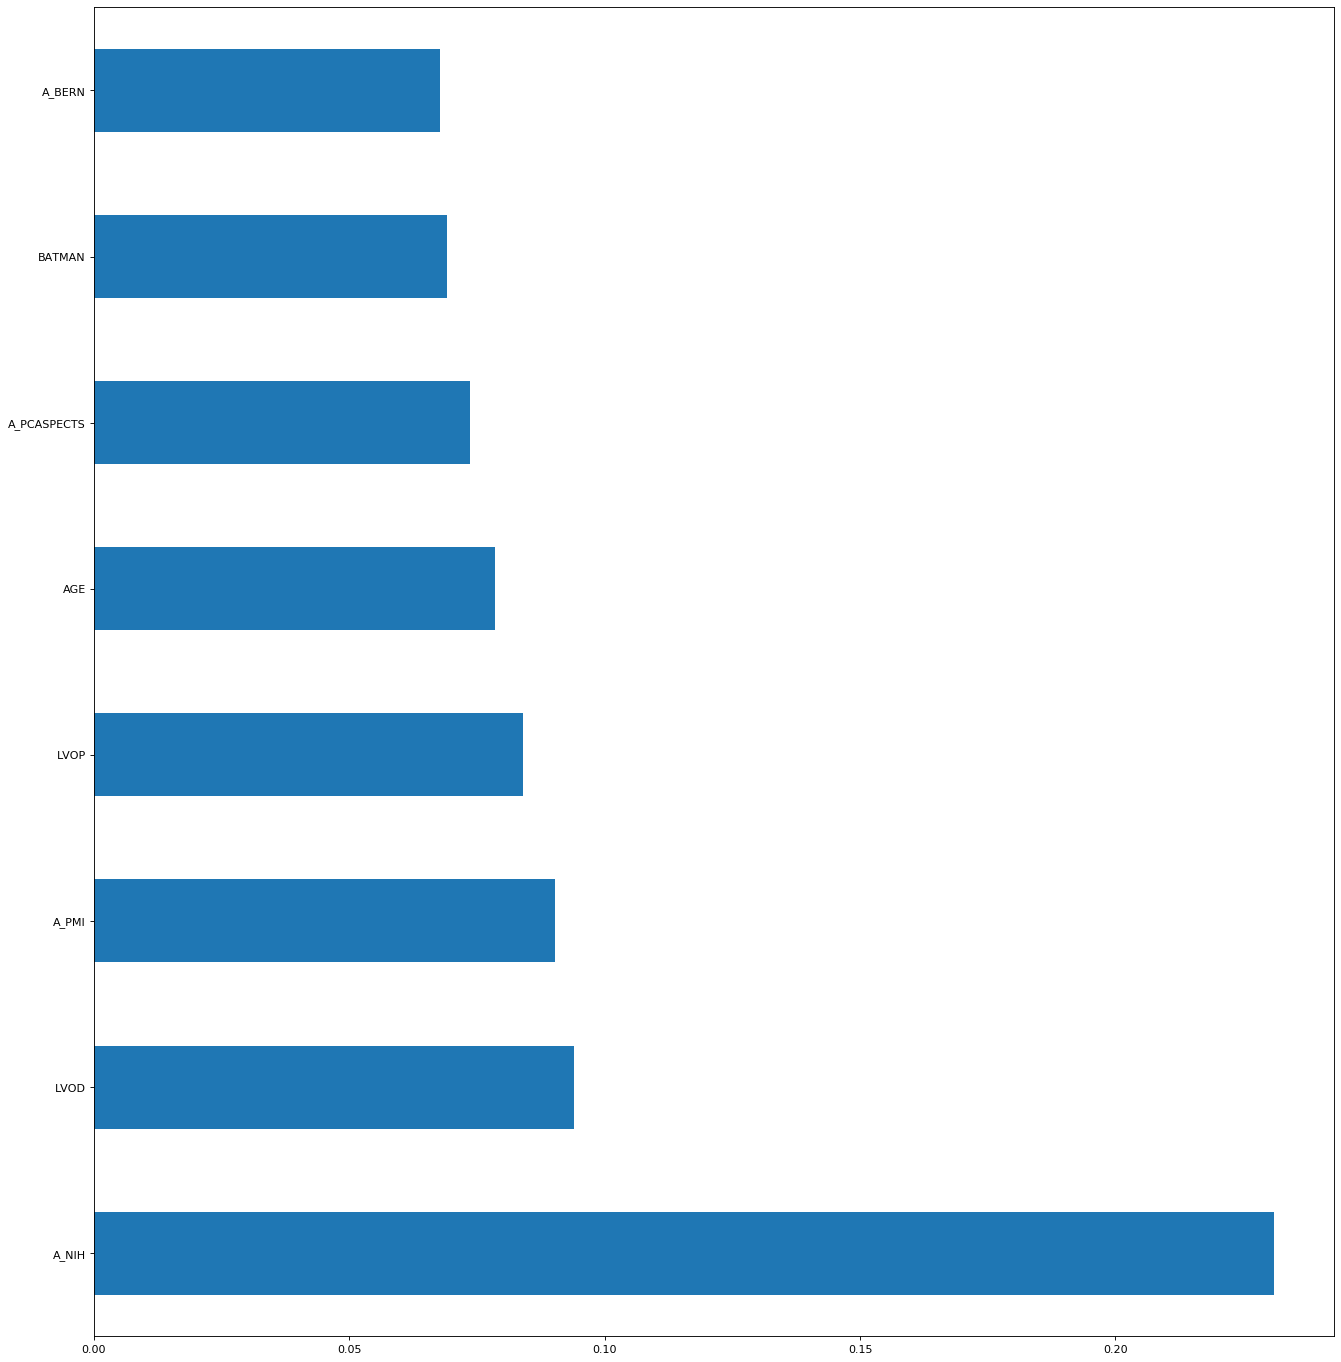

In [18]:
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(trainedxgb.feature_importances_,index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')

In [19]:
feat_importances

AGE                0.078661
LVOD               0.094022
LVOP               0.083991
A_MAP              0.056364
A_NIH              0.231113
A_GCS              0.000000
A_WBC              0.062193
A_GLU              0.000000
A_SCR              0.027100
A_PCASPECTS        0.073630
A_PMI              0.090316
A_BERN             0.067812
PCOA               0.000000
BATMAN             0.069248
SEX_1              0.000000
SEX_2              0.000000
H_HT_0             0.000000
H_HT_1             0.000000
H_DM_0             0.000000
H_DM_1             0.000000
H_HL_0             0.000000
H_HL_1             0.000000
H_CHD_0            0.000000
H_CHD_1            0.000000
H_AF_0             0.000000
H_AF_1             0.000000
H_STROKE_TIA_0     0.000000
H_STROKE_TIA_1     0.000000
H_MRS345_0         0.000000
H_MRS345_1         0.000000
CURRENT_SMOKE_0    0.000000
CURRENT_SMOKE_1    0.000000
SYMPTOM_1          0.000000
SYMPTOM_2          0.000000
SYMPTOM_3          0.000000
A_THALAMUS2_0      0

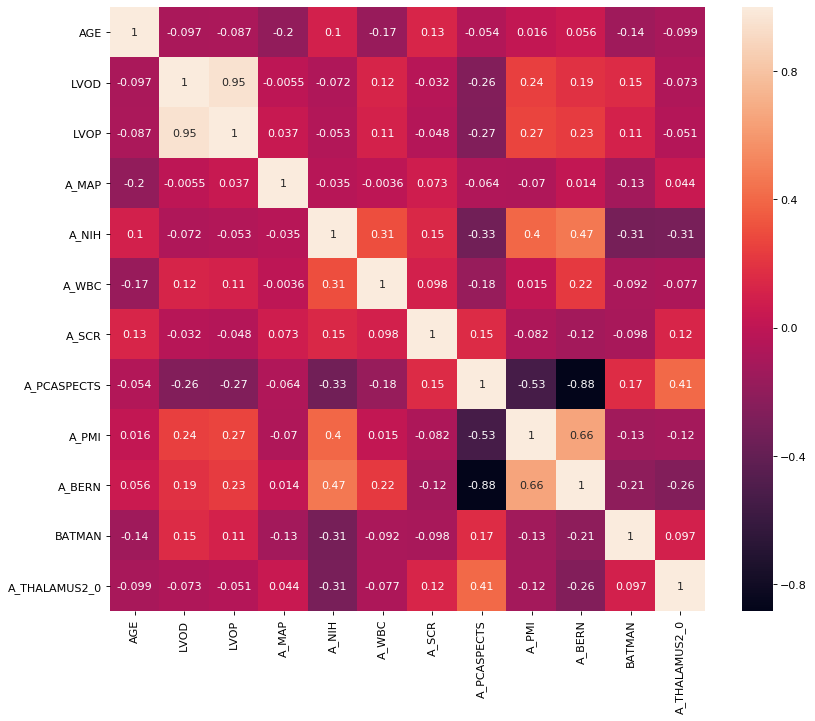

In [20]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr2 = X[feat_importances[feat_importances > 0].index].corr()

sns.heatmap(corr2, annot=True, fmt=".2g")

In [21]:
corr2

,AGE,LVOD,LVOP,A_MAP,A_NIH,A_WBC,A_SCR,A_PCASPECTS,A_PMI,A_BERN,BATMAN,A_THALAMUS2_0
AGE,1.000000,-0.096667,-0.086819,-0.197694,0.101207,-0.167096,0.126239,-0.053960,0.015871,0.056403,-0.137051,-0.099322
LVOD,-0.096667,1.000000,0.950794,-0.005468,-0.072248,0.119308,-0.031719,-0.260333,0.243446,0.185676,0.154267,-0.072756
LVOP,-0.086819,0.950794,1.000000,0.037451,-0.053354,0.107172,-0.047599,-0.266534,0.270587,0.228761,0.105298,-0.051354
A_MAP,-0.197694,-0.005468,0.037451,1.000000,-0.035226,-0.003636,0.073215,-0.063534,-0.070341,0.014459,-0.125565,0.043785
A_NIH,0.101207,-0.072248,-0.053354,-0.035226,1.000000,0.305871,0.145227,-0.333731,0.397738,0.466956,-0.313449,-0.309824
A_WBC,-0.167096,0.119308,0.107172,-0.003636,0.305871,1.000000,0.097778,-0.177534,0.014582,0.219770,-0.091994,-0.077172
A_SCR,0.126239,-0.031719,-0.047599,0.073215,0.145227,0.097778,1.000000,0.154344,-0.081950,-0.122831,-0.098351,0.124244
A_PCASPECTS,-0.053960,-0.260333,-0.266534,-0.063534,-0.333731,-0.177534,0.154344,1.000000,-0.532935,-0.884970,0.166263,0.408776
A_PMI,0.015871,0.243446,0.270587,-0.070341,0.397738,0.014582,-0.081950,-0.532935,1.000000,0.659015,-0.132592,-0.116031
A_BERN,0.056403,0.185676,0.228761,0.014459,0.466956,0.219770,-0.122831,-0.884970,0.659015,1.000000,-0.208421,-0.261295


LVOP与LVOD的相关性较强，A_BERN与A_PCASPECTS的相关性较强。

In [22]:
feat_importances

AGE                0.078661
LVOD               0.094022
LVOP               0.083991
A_MAP              0.056364
A_NIH              0.231113
A_GCS              0.000000
A_WBC              0.062193
A_GLU              0.000000
A_SCR              0.027100
A_PCASPECTS        0.073630
A_PMI              0.090316
A_BERN             0.067812
PCOA               0.000000
BATMAN             0.069248
SEX_1              0.000000
SEX_2              0.000000
H_HT_0             0.000000
H_HT_1             0.000000
H_DM_0             0.000000
H_DM_1             0.000000
H_HL_0             0.000000
H_HL_1             0.000000
H_CHD_0            0.000000
H_CHD_1            0.000000
H_AF_0             0.000000
H_AF_1             0.000000
H_STROKE_TIA_0     0.000000
H_STROKE_TIA_1     0.000000
H_MRS345_0         0.000000
H_MRS345_1         0.000000
CURRENT_SMOKE_0    0.000000
CURRENT_SMOKE_1    0.000000
SYMPTOM_1          0.000000
SYMPTOM_2          0.000000
SYMPTOM_3          0.000000
A_THALAMUS2_0      0

### 重新选择特征

In [23]:
X_Reduced = X[['AGE', 'LVOD', 'A_MAP', 'A_NIH', 'A_WBC', 'A_SCR',
       'A_PCASPECTS', 'A_PMI', 'BATMAN','A_THALAMUS2_0']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, 
                                                        random_state = 101)


In [24]:
start = time.process_time()
trainedxgb2 = xgb.XGBClassifier(learning_rate=0.01,n_estimators=96,max_depth=3).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionxgb2 = trainedxgb2.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionxgb2))
print(classification_report(Y_Test2,predictionxgb2))

0.015625
[[12  7]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.65      0.81      0.72        16

    accuracy                           0.71        35
   macro avg       0.73      0.72      0.71        35
weighted avg       0.73      0.71      0.71        35



In [25]:
preds2 = trainedxgb2.predict_proba(X_Test2)

print("ROC_AUC:",roc_auc_score(Y_Test2,preds2[:,1]))

ROC_AUC: 0.7598684210526315


### 决策树

In [26]:
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

0.0
[[11  8]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.47      0.44      0.45        16

    accuracy                           0.51        35
   macro avg       0.51      0.51      0.51        35
weighted avg       0.51      0.51      0.51        35



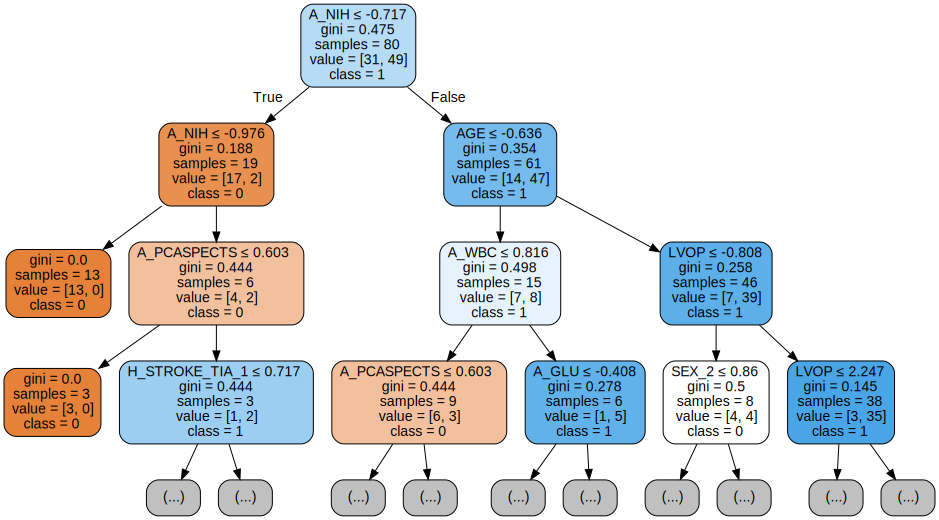

In [27]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=3,
                       special_characters=True)
graph = graphviz.Source(data)
graph

### Recursive Feature Elimination(RFE)

In [28]:
from sklearn.feature_selection import RFE

In [29]:
model = xgb.XGBClassifier(learning_rate=0.01,n_estimators=96,max_depth=3)

In [30]:
rfe = RFE(model,10)

In [31]:
X_Train.shape

(80, 47)

In [32]:
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
print(rfe.support_)
print(X_Train.columns[rfe.support_])
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time()-start)
print("Overall Accuracy using RFE:",rfe.score(RFE_X_Test,Y_Test))

[ True  True  True False  True False  True False False  True  True  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False]
Index(['AGE', 'LVOD', 'LVOP', 'A_NIH', 'A_WBC', 'A_PCASPECTS', 'A_PMI',
       'A_BERN', 'BATMAN', 'A_THALAMUS2_0'],
      dtype='object')
0.9375
Overall Accuracy using RFE: 0.7142857142857143


['AGE', 'LVOD', 'A_MAP', 'A_NIH', 'A_WBC', 'A_SCR',
       'A_PCASPECTS', 'A_PMI', 'BATMAN','A_THALAMUS2_0']

In [33]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [34]:
# X_Reduced2 = X[['AGE', 'LVOD',  'A_NIH', 'A_WBC', 'A_PCASPECTS', 'A_PMI', 'BATMAN','A_THALAMUS2_0']]
# X_Reduced2 = X[['A_NIH']]
X_Reduced2 = X[['A_NIH','A_THALAMUS2_0','MIDDLE_BAO_1', 'A_PMI']]

X_Reduced2 = StandardScaler().fit_transform(X_Reduced2)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_Reduced2, Y, test_size = 0.30, 
                                                        random_state = 101)
start = time.process_time()
trainedxgb3 = xgb.XGBClassifier(learning_rate=0.01,n_estimators=96,max_depth=3).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionxgb3 = trainedxgb3.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionxgb3))
print(classification_report(Y_Test3,predictionxgb3))

0.015625
[[12  7]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.65      0.81      0.72        16

    accuracy                           0.71        35
   macro avg       0.73      0.72      0.71        35
weighted avg       0.73      0.71      0.71        35



In [35]:
preds3 = trainedxgb3.predict_proba(X_Test3)

print("ROC_AUC:",roc_auc_score(Y_Test3,preds3[:,1]))

ROC_AUC: 0.8536184210526316


属性"A_NIH"主要贡献了分类准确率

### Lasso Regression

In [36]:
from sklearn.linear_model import LassoCV

In [37]:
regr = LassoCV(cv=4,random_state=101)

In [38]:
# X_Reduced2 = X[['AGE', 'LVOD',  'A_NIH', 'A_WBC', 'A_PCASPECTS', 'A_PMI', 'BATMAN','A_THALAMUS2_0']]
# X_Reduced3 = X[['A_NIH','BATMAN','A_THALAMUS2_0','MIDDLE_BAO_1','A_THALAMUS2_1','MIDDLE_BAO_0']]

# X_Reduced3 = StandardScaler().fit_transform(X_Reduced3)
# X_Train4, X_Test4, Y_Train4, Y_Test4 = train_test_split(X_Reduced3, Y, test_size = 0.30, 
#                                                         random_state = 101)

In [39]:
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = X.columns)
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.028864951441798004
LassoCV Model Accuracy:  0.3257782772222587
Variables Eliminated:  30
Variables Kept:  17


In [40]:
regr.coef_

array([ 6.76042179e-02,  0.00000000e+00,  4.23469921e-02, -0.00000000e+00,
        1.66078096e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.39460150e-02,  8.20518849e-02,  8.57442981e-02, -0.00000000e+00,
       -1.03775292e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.83929776e-03, -1.15835927e-17,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -8.67354501e-02,
        1.84207677e-17, -3.73353405e-02,  2.20286316e-17,  1.59471133e-03,
       -0.00000000e+00, -9.54455637e-02,  2.41791348e-16,  0.00000000e+00,
       -3.98355358e-03,  0.00000000e+00,  0.00000000e+00])

Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

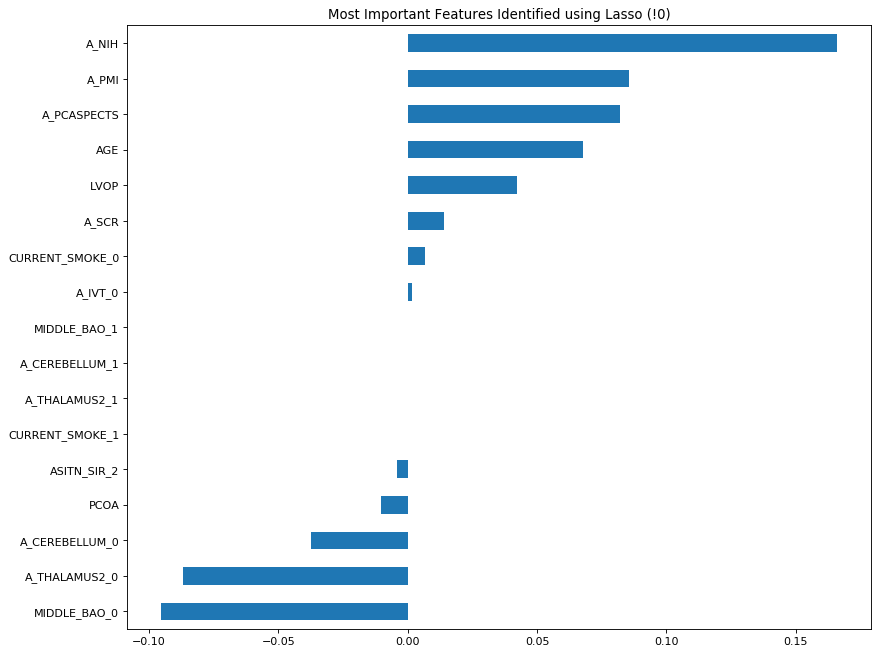

In [41]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [43]:
logistic = LogisticRegression(penalty="l1", random_state=7).fit(X_Train,Y_Train)
model = SelectFromModel(logistic,prefit=True)

c:\users\you\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
logistic_coef = pd.Series(logistic.coef_[0], index = X_Train.columns)

Text(0.5, 1.0, 'Most Important Features Identified using logistic_L1 (!0)')

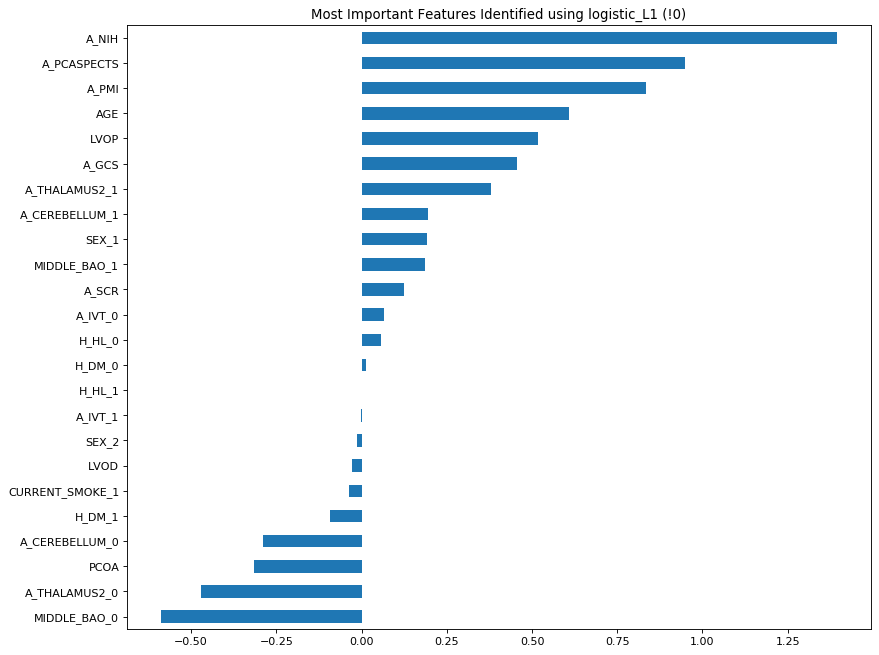

In [45]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_logistic_coef = logistic_coef.sort_values()
top_logistic_coef [top_logistic_coef  != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using logistic_L1 (!0)")

In [46]:
model.estimator.coef_

array([[ 6.07525628e-01, -2.76663402e-02,  5.17648897e-01,
         0.00000000e+00,  1.39533736e+00,  4.54690193e-01,
         0.00000000e+00,  0.00000000e+00,  1.23650585e-01,
         9.47537753e-01,  8.34167911e-01,  0.00000000e+00,
        -3.15843338e-01,  0.00000000e+00,  1.93205806e-01,
        -1.21542901e-02,  0.00000000e+00,  0.00000000e+00,
         1.43363769e-02, -9.21052137e-02,  5.65206586e-02,
        -4.58664794e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.66079337e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.72276104e-01,
         3.78479085e-01, -2.89704728e-01,  1.96105349e-01,
         6.63249282e-02, -5.10326172e-04, -5.88834807e-01,
         1.86594861e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])